# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.head()

,0
0,saint-francois
1,laguna
2,bambous virieux
3,tasiilaq
4,hovd


In [4]:
df = cities_df.rename(index=str, columns={0: 'City'})
df.head()

,City
0,saint-francois
1,laguna
2,bambous virieux
3,tasiilaq
4,hovd


In [5]:
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-francois,,,,,,,,
1,laguna,,,,,,,,
2,bambous virieux,,,,,,,,
3,tasiilaq,,,,,,,,
4,hovd,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "hovd"

query_url = url + "appid=" + api_key + "&q=" + city

In [51]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [52]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 63.83, 'lon': 10.7},
 'dt': 1553668265,
 'id': 7626384,
 'main': {'humidity': 93,
          'pressure': 1016,
          'temp': 278.01,
          'temp_max': 279.82,
          'temp_min': 275.93},
 'name': 'Hovd',
 'sys': {'country': 'NO',
         'id': 1676,
         'message': 0.0086,
         'sunrise': 1553662490,
         'sunset': 1553709021,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09d',
              'id': 300,
              'main': 'Drizzle'},
             {'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 280, 'speed': 5.1}}


In [38]:
print(weather_json['name'])
print(weather_json['clouds']['all'])
print(weather_json['sys']['country'])
print(weather_json['dt'])
print(weather_json['main']['humidity'])
print(weather_json['coord']['lat'])
print(weather_json['coord']['lon'])
print(round(weather_json['main']['temp_max']*(9/5)-459.67, 2))
print(weather_json['wind']['speed'])

Lompoc
75
US
1553666213
93
34.64
-120.46
55.4
2.1


In [53]:
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in df.iterrows():

    selectedcity = row['City']

    query_url = url + "appid=" + api_key + "&q=" + selectedcity
    
    weather_response = requests.get(query_url)
    weather = weather_response.json()
    
    try:
        print(f"Processing Record {index} | {selectedcity}")
        
        df.loc[index, 'Cloudiness'] = weather['clouds']['all']
        df.loc[index, 'Country'] = weather['sys']['country']
        df.loc[index, 'Date'] = weather['dt']
        df.loc[index, 'Humidity'] = weather['main']['humidity']
        df.loc[index, 'Lat'] = weather['coord']['lat']
        df.loc[index, 'Lng'] = weather['coord']['lon']
        df.loc[index, 'Max Temp'] = round(weather['main']['temp_max']*(9/5)-459.67, 2)
        df.loc[index, 'Wind Speed'] = weather['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 0 | saint-francois
Processing Record 1 | laguna
Processing Record 2 | bambous virieux
Processing Record 3 | tasiilaq
Processing Record 4 | hovd
Processing Record 5 | busselton
Processing Record 6 | rikitea
Processing Record 7 | dubuque
Processing Record 8 | barentsburg
City not found. Skipping...
Processing Record 9 | cimislia
Processing Record 10 | victoria
Processing Record 11 | tiksi
Processing Record 12 | north bend
Processing Record 13 | cape town
Processing Record 14 | lewiston
Processing Record 15 | broome
Processing Record 16 | vaini
Processing Record 17 | cotonou
Processing Record 18 | eyl
Processing Record 19 | brufut
Processing Record 20 | besuki
Processing Record 21 | mocuba
Processing Record 22 | a coruna
Processing Record 23 | alta floresta
Processing Record 24 | hambantota
Processing Record 25 | vostok
Processing Record 26 | ushuaia
Processing Record 27 | atuona
Processing Record 28 | tual
Processing Record 29 | thaton
Processing Record 30 | kapaa
Proce

Processing Record 235 | port keats
Processing Record 236 | port elizabeth
Processing Record 237 | mafinga
City not found. Skipping...
Processing Record 238 | serenje
Processing Record 239 | abu dhabi
Processing Record 240 | letka
Processing Record 241 | alpena
Processing Record 242 | vila velha
Processing Record 243 | vuktyl
Processing Record 244 | touros
Processing Record 245 | newport
Processing Record 246 | noumea
Processing Record 247 | sinegorye
Processing Record 248 | miraflores
Processing Record 249 | masvingo
Processing Record 250 | nagato
Processing Record 251 | miri
Processing Record 252 | koson
Processing Record 253 | murdochville
Processing Record 254 | nabire
Processing Record 255 | cayenne
Processing Record 256 | cabo san lucas
Processing Record 257 | nelson bay
Processing Record 258 | englehart
Processing Record 259 | salalah
Processing Record 260 | saint-georges
Processing Record 261 | srednekolymsk
Processing Record 262 | roald
Processing Record 263 | mys shmidta
City 

Processing Record 459 | tombouctou
Processing Record 460 | sitka
Processing Record 461 | pauini
Processing Record 462 | entebbe
Processing Record 463 | tumannyy
City not found. Skipping...
Processing Record 464 | kawalu
Processing Record 465 | carauari
Processing Record 466 | krasnoselkup
City not found. Skipping...
Processing Record 467 | manggar
Processing Record 468 | gijon
Processing Record 469 | caala
Processing Record 470 | fort saint john
City not found. Skipping...
Processing Record 471 | vozdvizhenka
Processing Record 472 | tasbuget
City not found. Skipping...
Processing Record 473 | grand river south east
City not found. Skipping...
Processing Record 474 | fergus falls
Processing Record 475 | zonguldak
Processing Record 476 | liberia
Processing Record 477 | shelburne
Processing Record 478 | te anau
Processing Record 479 | vaitape
Processing Record 480 | porto novo
Processing Record 481 | omsukchan
Processing Record 482 | karatau
Processing Record 483 | norman wells
Processing

In [71]:
df['Cloudiness'].replace('', np.nan, inplace=True)
df_cleaned = df.dropna(how='any')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
df_cleaned.to_csv("Output/weatherdata.csv", index=False, header=True)

In [80]:
print(len(df_cleaned['City']))
print(len(df_cleaned['Cloudiness']))
print(len(df_cleaned['Country']))
print(len(df_cleaned['Date']))
print(len(df_cleaned['Humidity']))
print(len(df_cleaned['Lat']))
print(len(df_cleaned['Lng']))
print(len(df_cleaned['Max Temp']))
print(len(df_cleaned['Wind Speed']))

551
551
551
551
551
551
551
551
551


In [82]:
df_cleaned.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-francois,0.0,FR,1553668239,92,46.42,3.91,28.99,1
1,laguna,44.0,MX,1553668629,63,27.52,-110.01,63.8,0.78
2,bambous virieux,40.0,MU,1553668446,74,-20.34,57.76,87.01,3.6
3,tasiilaq,48.0,GL,1553665800,67,65.61,-37.64,23,3.6
4,hovd,90.0,NO,1553668265,93,63.83,10.7,44.01,5.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

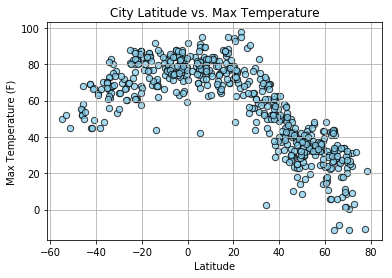

In [104]:
plt.scatter(df_cleaned['Lat'], df_cleaned['Max Temp'], marker="o", facecolors="skyblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.savefig('lat_temp.png')

#### Latitude vs. Humidity Plot

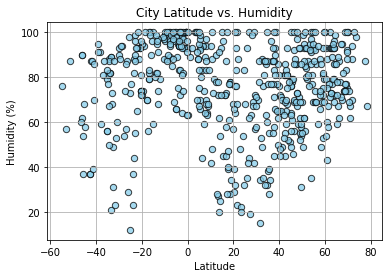

In [105]:
plt.scatter(df_cleaned['Lat'], df_cleaned['Humidity'], marker="o", facecolors="skyblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig('lat_humidity.png')

#### Latitude vs. Cloudiness Plot

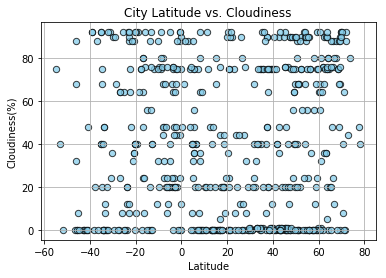

In [106]:
plt.scatter(df_cleaned['Lat'], df_cleaned['Cloudiness'], marker="o", facecolors="skyblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.savefig('lat_cloudiness.png')

#### Latitude vs. Wind Speed Plot

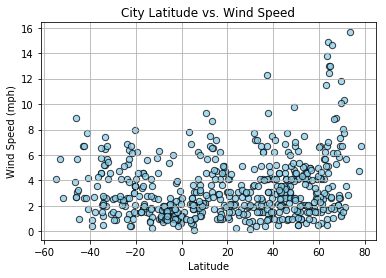

In [107]:
plt.scatter(df_cleaned['Lat'], df_cleaned['Wind Speed'], marker="o", facecolors="skyblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.savefig('lat_windspeed.png')